## Import Essentials Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Import

In [2]:
data=pd.read_csv("city_day.csv")

In [3]:
data.head(10)

City        Date  PM2.5  PM10  NO    NO2     NOx  NH3      CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN NaN  18.22   17.15  NaN    0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN NaN  15.69   16.46  NaN    0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN NaN  19.30   29.70  NaN   17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN NaN  18.48   17.97  NaN    1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN NaN  21.42   37.76  NaN   22.10  39.33   
5  Ahmedabad  2015-01-06    NaN   NaN NaN  38.48   81.50  NaN   45.41  45.76   
6  Ahmedabad  2015-01-07    NaN   NaN NaN  40.62  130.77  NaN  112.16  32.28   
7  Ahmedabad  2015-01-08    NaN   NaN NaN  36.74   96.75  NaN   80.87  38.54   
8  Ahmedabad  2015-01-09    NaN   NaN NaN  31.00   48.00  NaN   29.16  58.68   
9  Ahmedabad  2015-01-10    NaN   NaN NaN   7.04    0.00  NaN     NaN   8.29   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
5   46.51     5.42    10.83    1.93  NaN        NaN  
6   33.47     0.00     0.00    0.00  NaN        NaN  
7   31.89     0.00     0.00    0.00  NaN        NaN  
8   25.75     0.00     0.00    0.00  NaN        NaN  
9    4.55     0.00     0.00    0.00  NaN        NaN

In [4]:
data["Date"]=pd.to_datetime(data["Date"])
data["year"]=data["Date"].dt.year
data.head()

City       Date  PM2.5  PM10  NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN NaN  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN NaN  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN NaN  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN NaN  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN NaN  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  year  
0  133.36     0.00     0.02    0.00  NaN        NaN  2015  
1   34.06     3.68     5.50    3.77  NaN        NaN  2015  
2   30.70     6.80    16.40    2.25  NaN        NaN  2015  
3   36.08     4.43    10.14    1.00  NaN        NaN  2015  
4   39.31     7.01    18.89    2.78  NaN        NaN  2015

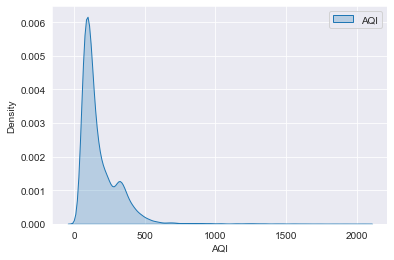

In [5]:
sns.set_style("darkgrid")
sns.kdeplot(x=data["AQI"],data=data, label="AQI",shade=True)
plt.legend()
plt.show()

### Which city has lowest AQI

In [6]:
aqi=data.groupby("City")["AQI"].min().reset_index()
aqi=aqi.sort_values("AQI")

aqi

City   AQI
20             Talcher  13.0
19            Shillong  14.0
3             Amritsar  20.0
4            Bengaluru  20.0
6         Brajrajnagar  22.0
12           Hyderabad  22.0
2            Amaravati  24.0
11            Guwahati  25.0
7           Chandigarh  26.0
15             Kolkata  26.0
14          Jorapokhar  27.0
9                Delhi  29.0
8              Chennai  30.0
21  Thiruvananthapuram  36.0
5               Bhopal  37.0
10            Gurugram  38.0
16             Lucknow  39.0
17              Mumbai  40.0
1               Aizawl  40.0
13              Jaipur  43.0
0            Ahmedabad  48.0
18               Patna  60.0

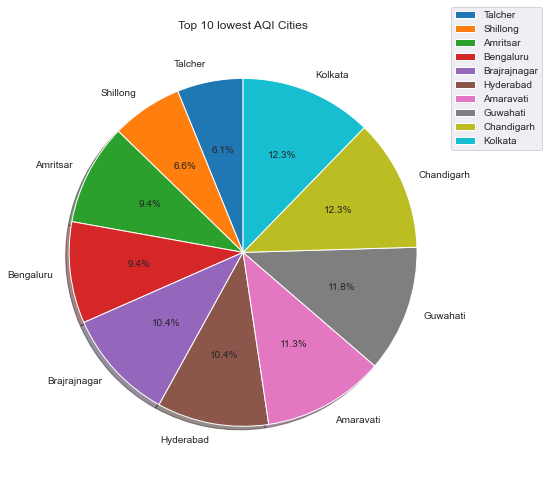

In [7]:
#Top 10 Lowest AQI City
aqi=aqi.sort_values("AQI").iloc[:10,:]
fig,ax=plt.subplots(figsize=(12,8))
ax.pie(aqi["AQI"],labels=aqi["City"],autopct="%1.1f%%",shadow=True,startangle=90)
plt.legend(loc="right",bbox_to_anchor=(1.2,0.9))
plt.title("Top 10 lowest AQI Cities")
fig.savefig("Top 10 lowest AQI City")
plt.show()

In [8]:
aqi

City   AQI
20       Talcher  13.0
19      Shillong  14.0
3       Amritsar  20.0
4      Bengaluru  20.0
6   Brajrajnagar  22.0
12     Hyderabad  22.0
2      Amaravati  24.0
11      Guwahati  25.0
7     Chandigarh  26.0
15       Kolkata  26.0

In [9]:
prec=data.loc[:,["City","year","AQI"]]
prec["mean_AQI"]=prec.groupby(["City","year"])["AQI"].transform("mean")
prec.drop("AQI",axis=1,inplace=True)
prec=prec.drop_duplicates()
prec=prec.sort_values("year",ascending=False)
top_10=["Talcher","Amritsar","Brajrajnagar","Hyderabad","Chandigarh","Delhi","Chennai","Gurugram","Lucknow","Mumbai","Patna"]
prec=prec.loc[prec["City"].isin(top_10)]
prec=prec.sort_values("year")
prec=prec.fillna(100)

fig=px.bar(prec,x="City",y="mean_AQI",animation_frame="year",animation_group="City",color="City",hover_name="City")
fig.show()

## Which city has highest AQI

In [10]:
aqi=data.groupby("City")["AQI"].max().reset_index()
aqi=aqi.sort_values("AQI",ascending=False)
aqi

City     AQI
0            Ahmedabad  2049.0
11            Guwahati   956.0
10            Gurugram   891.0
3             Amritsar   869.0
12           Hyderabad   737.0
9                Delhi   716.0
16             Lucknow   707.0
18               Patna   619.0
14          Jorapokhar   604.0
20             Talcher   570.0
15             Kolkata   475.0
13              Jaipur   457.0
8              Chennai   449.0
6         Brajrajnagar   355.0
4            Bengaluru   352.0
7           Chandigarh   335.0
2            Amaravati   312.0
5               Bhopal   312.0
17              Mumbai   307.0
21  Thiruvananthapuram   230.0
19            Shillong   182.0
1               Aizawl    92.0

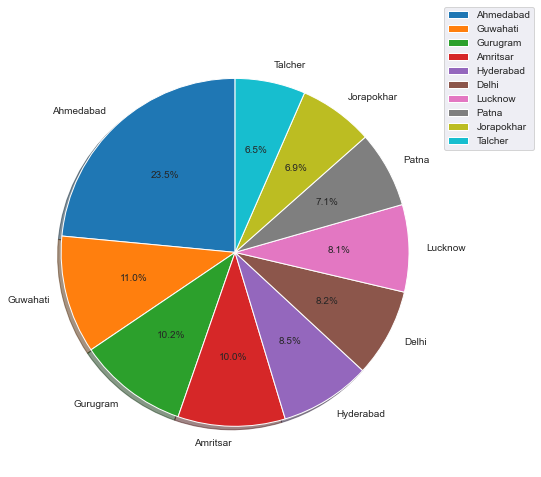

In [11]:
# Top 10 highest AQI City
aqi=aqi.head(10)
fig,ax=plt.subplots(figsize=(12,8))
ax.pie(aqi["AQI"],labels=aqi["City"],autopct="%1.1f%%",shadow=True,startangle=90)
plt.legend(loc="right",bbox_to_anchor=(1.2,0.9))
fig.savefig("Top 10 highest AQI Cities")
plt.show()

In [12]:
prec=data.loc[:,["City","year","AQI"]]
prec["mean_aqi"]=prec.groupby(["City","year"])["AQI"].transform("mean")
prec=prec.drop("AQI",axis=1)
prec=prec.drop_duplicates()
prec=prec.sort_values("year",ascending=False)
top1=["Ahmedabad","Guwahati","Gurugram","Delhi"]
prec=prec.loc[prec["City"].isin(top1)]
prec=prec.sort_values("year")
prec=prec.fillna(100)

In [13]:
fig=px.bar(prec,x="City",y="mean_aqi",animation_frame="year",animation_group="City",color="City",hover_name="City")
fig.show()

## Looking at each of the  cities with highest AQI

In [14]:
data1=data.groupby("City")["AQI"].mean().reset_index().dropna()
data1.sort_values("AQI",ascending=False,inplace=True)

data1.head(10)

City         AQI
0      Ahmedabad  473.912281
9          Delhi  262.255086
18         Patna  248.270153
10      Gurugram  230.518600
16       Lucknow  222.881833
20       Talcher  179.990506
14    Jorapokhar  162.746009
11      Guwahati  156.486683
15       Kolkata  151.535714
6   Brajrajnagar  151.519345

In [15]:
#array of top 10 cities with highest AQI
top_10_cities=data1.head(10)["City"].tolist()
top_10_cities

['Ahmedabad',
 'Delhi',
 'Patna',
 'Gurugram',
 'Lucknow',
 'Talcher',
 'Jorapokhar',
 'Guwahati',
 'Kolkata',
 'Brajrajnagar']

### Talcher AQI Map

In [16]:
# year wise mean of AQI of Talcher city
talcher=data[data["City"]=="Talcher"]
data_by_year=talcher.groupby("year")["AQI"].mean().reset_index().dropna()
data_by_year

year         AQI
1  2018  185.744770
2  2019  169.023102
3  2020  201.633333

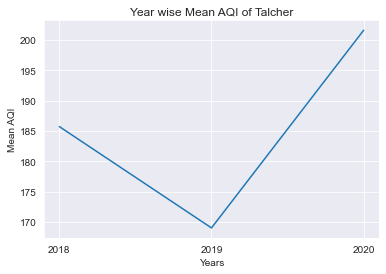

In [17]:
plt.plot(data_by_year["year"],data_by_year["AQI"])
plt.xticks(data_by_year["year"])
plt.title('Year wise Mean AQI of Talcher')
plt.xlabel("Years")
plt.ylabel("Mean AQI")

plt.show()

## Brajrajnagar AQI Map

In [18]:
# Year wise mean AQI of Brajrajnagar 
Brajrajnagar=data[data["City"]=="Brajrajnagar"]
data_by_year=Brajrajnagar.groupby("year")["AQI"].mean().reset_index().dropna()
data_by_year

year         AQI
0  2017  247.600000
1  2018  154.996154
2  2019  148.400621
3  2020  140.762500

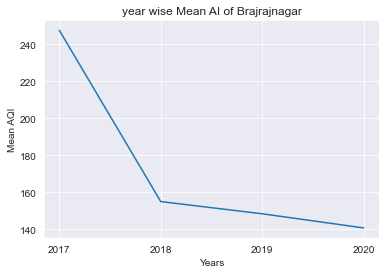

In [19]:
plt.plot(data_by_year["year"],data_by_year["AQI"])
plt.xticks(data_by_year["year"])
plt.title("year wise Mean AI of Brajrajnagar")
plt.xlabel("Years")
plt.ylabel("Mean AQI")
plt.show()

## Plotting lineplot of year  wise AQI of all cities 

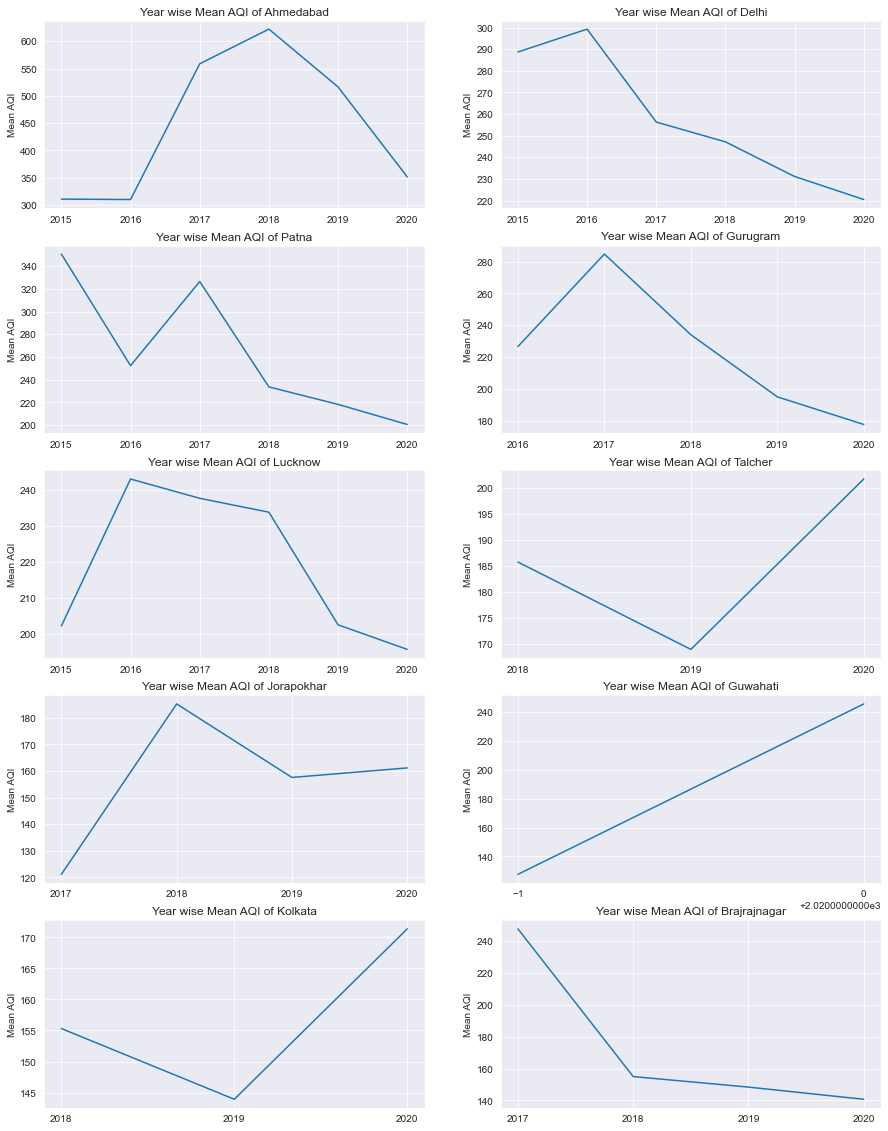

In [20]:
fig=plt.figure(figsize=(15,20))
for city,num in zip(top_10_cities,range(1,11)):
    df=data[data["City"]==city]
    data_by_year=df.groupby("year")["AQI"].mean().reset_index().dropna()
    ax=fig.add_subplot(5,2,num)
    ax.plot(data_by_year["year"],data_by_year["AQI"])
    ax.set_xticks(data_by_year["year"])
    ax.set_title("Year wise Mean AQI of {}".format(city))
    ax.set_ylabel("Mean AQI")
                
                                    

## Which City has highest NO

In [21]:
df=data.fillna(0.0)

In [22]:
no=df.groupby("City")["NO"].mean().reset_index()
no=no.sort_values("NO",ascending=False)
no=no.head(10)

In [23]:
no

City         NO
9        Delhi  40.210919
15     Kolkata  28.431257
18       Patna  27.141380
20     Talcher  25.185184
11    Guwahati  23.250905
3     Amritsar  16.953740
10    Gurugram  16.549580
16     Lucknow  15.445236
13      Jaipur  15.206550
7   Chandigarh  13.347838

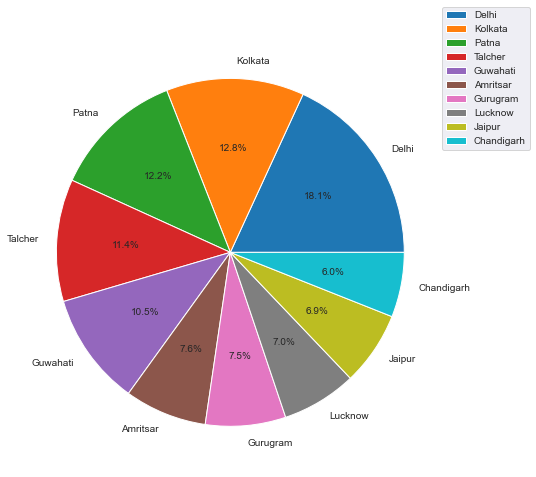

In [24]:
fig,ax=plt.subplots(figsize=(12,8))
ax.pie(no["NO"],labels=no["City"],autopct="%1.1f%%")
plt.legend(loc="right",bbox_to_anchor=(1.2,0.9))
plt.show()

In [25]:
prec=df.loc[:,["City","year","NO"]]
prec["mean_NO"]=prec.groupby(["City","year"])["NO"].transform("mean")
prec.drop("NO",axis=1,inplace=True)
prec=prec.drop_duplicates()
prec=prec.sort_values("year",ascending=False)
top2=["Chandigarh","Delhi","Gurugram","Lucknow","Patna"]
prec=prec.loc[prec["City"].isin(top_10)]
prec=prec.sort_values("year")


fig=px.bar(prec,x="City",y="mean_NO",animation_frame="year",animation_group="City",color="City",hover_name="City")
fig.show()

## Distribution of NO,NO2 and Others

No handles with labels found to put in legend.


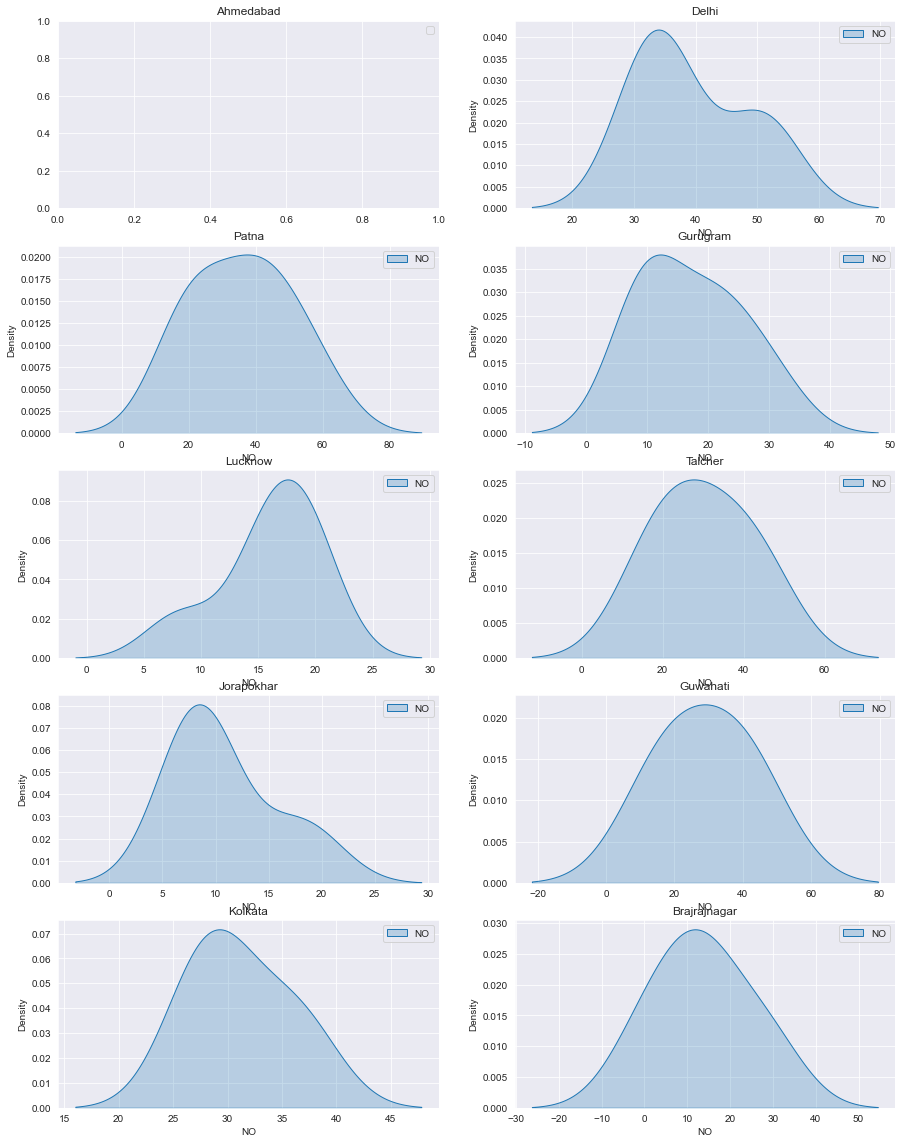

In [26]:
# city wise distribution of NO

fig=plt.figure(figsize=(15,20))
for city,num in zip(top_10_cities,range(1,11)):
    df=data[data["City"]==city]
    df=df.groupby("year")["NO"].mean().reset_index().dropna()
    ax=fig.add_subplot(5,2,num)
    ax.set_title(city)
    sns.kdeplot(data=df["NO"],label="NO",shade=True)
    plt.legend()
   

                

In [27]:
data.head(2)

City       Date  PM2.5  PM10  NO    NO2    NOx  NH3    CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN NaN  18.22  17.15  NaN  0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN NaN  15.69  16.46  NaN  0.97  24.55   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  year  
0  133.36     0.00     0.02    0.00  NaN        NaN  2015  
1   34.06     3.68     5.50    3.77  NaN        NaN  2015

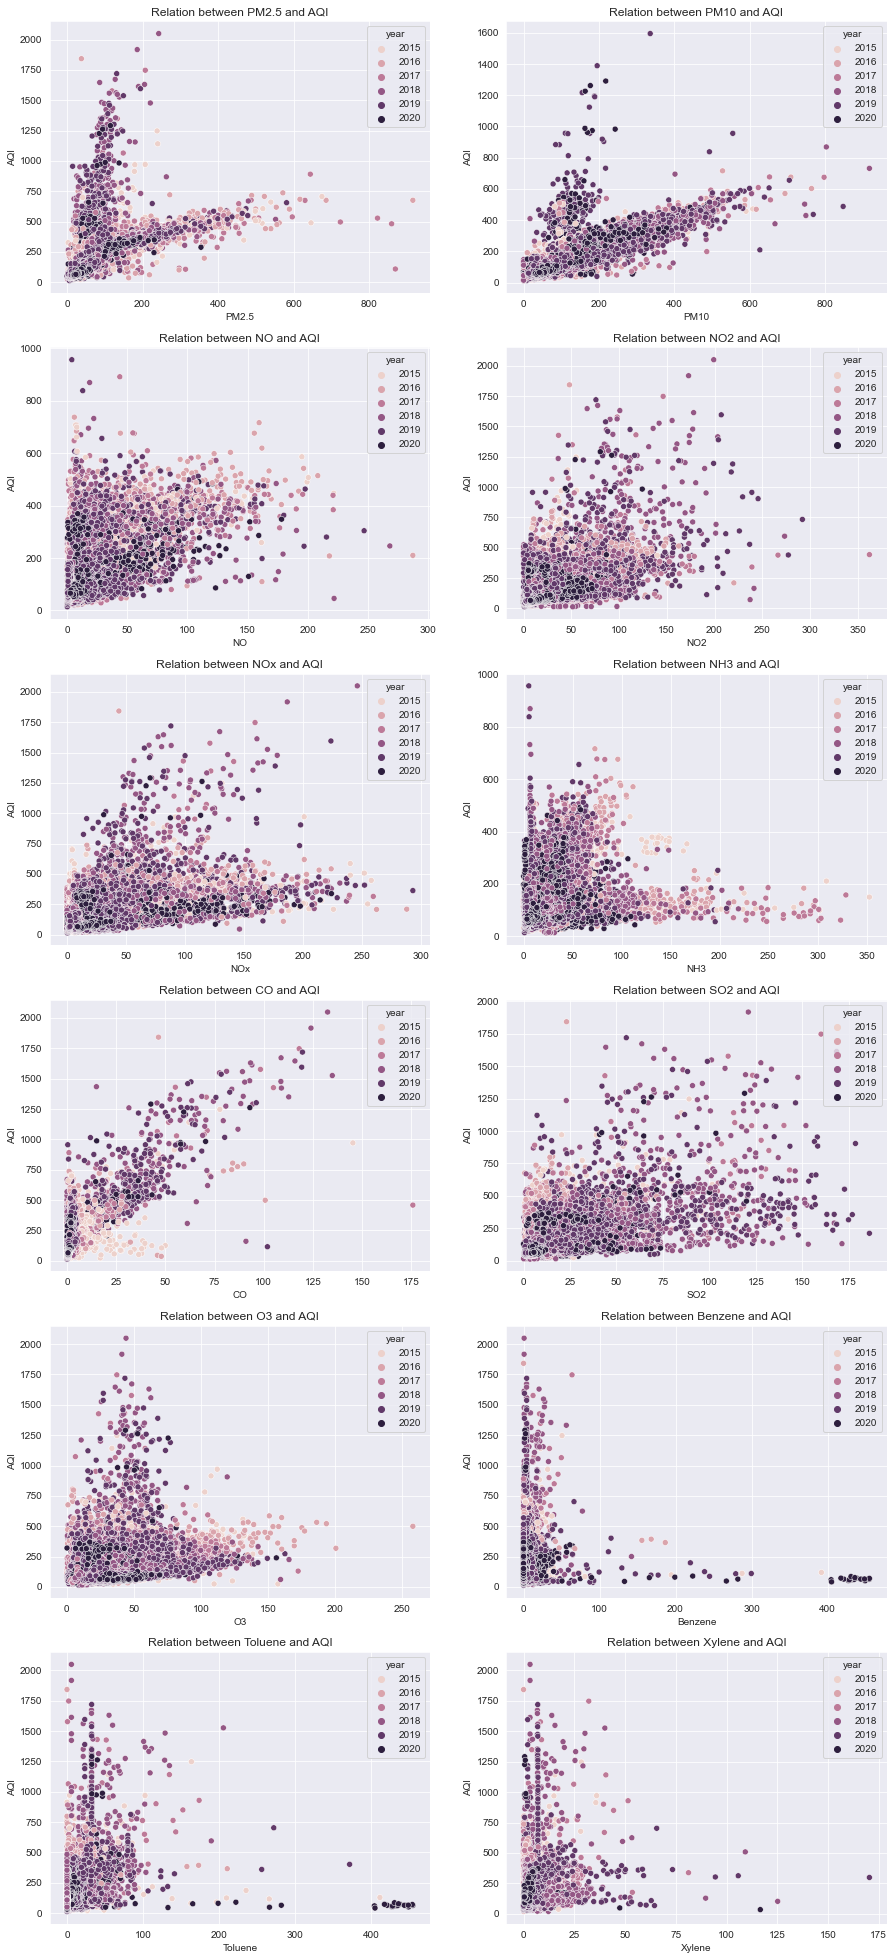

In [28]:
variables=["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]
fig=plt.figure(figsize=(15,35))
for variables,num in zip(variables,range(1,len(variables)+1)):
    ax=fig.add_subplot(6,2,num)
    sns.scatterplot(x=variables,y="AQI",hue="year",data=data)
    plt.title("Relation between {} and AQI".format(variables))
    plt.xlabel(variables)
    plt.ylabel("AQI")

# Line chart of cities(AQI vs Date)

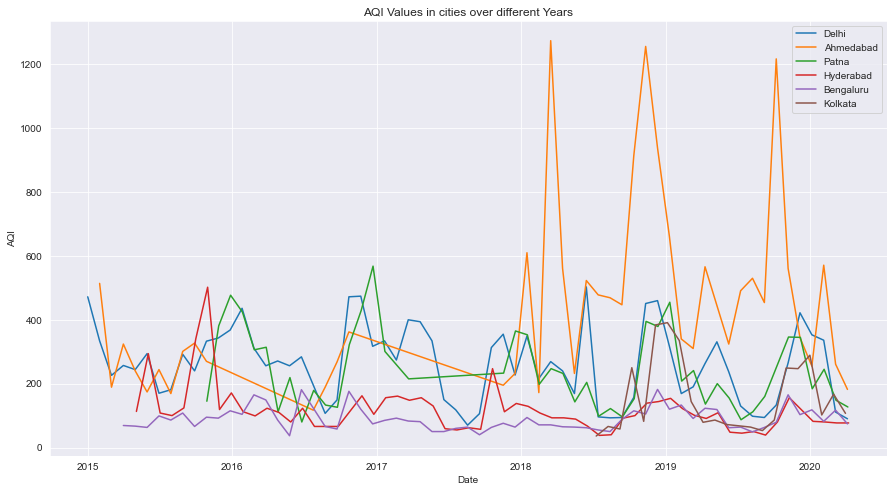

In [29]:
cities=["Delhi","Ahmedabad","Patna","Hyderabad","Bengaluru","Kolkata","Locknow"]
fig,ax=plt.subplots(figsize=(15,8))

for city in cities:
    sns.lineplot(x="Date",y="AQI",data=data[data["City"]==city].loc[::30],label=city)
    
ax.set_title("AQI Values in cities over different Years")  
plt.show()
fig.savefig("AQI Values in different cities over the different Years")